## Importing Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

## Uploading Data

In [ ]:
url = 'https://raw.githubusercontent.com/JosephJ7/AIML/main/New%20Wine1.csv'
wine = pd.read_csv(url)
wine=wine.drop(['Unnamed: 0','taste'],axis=1)
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


## EDA

In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

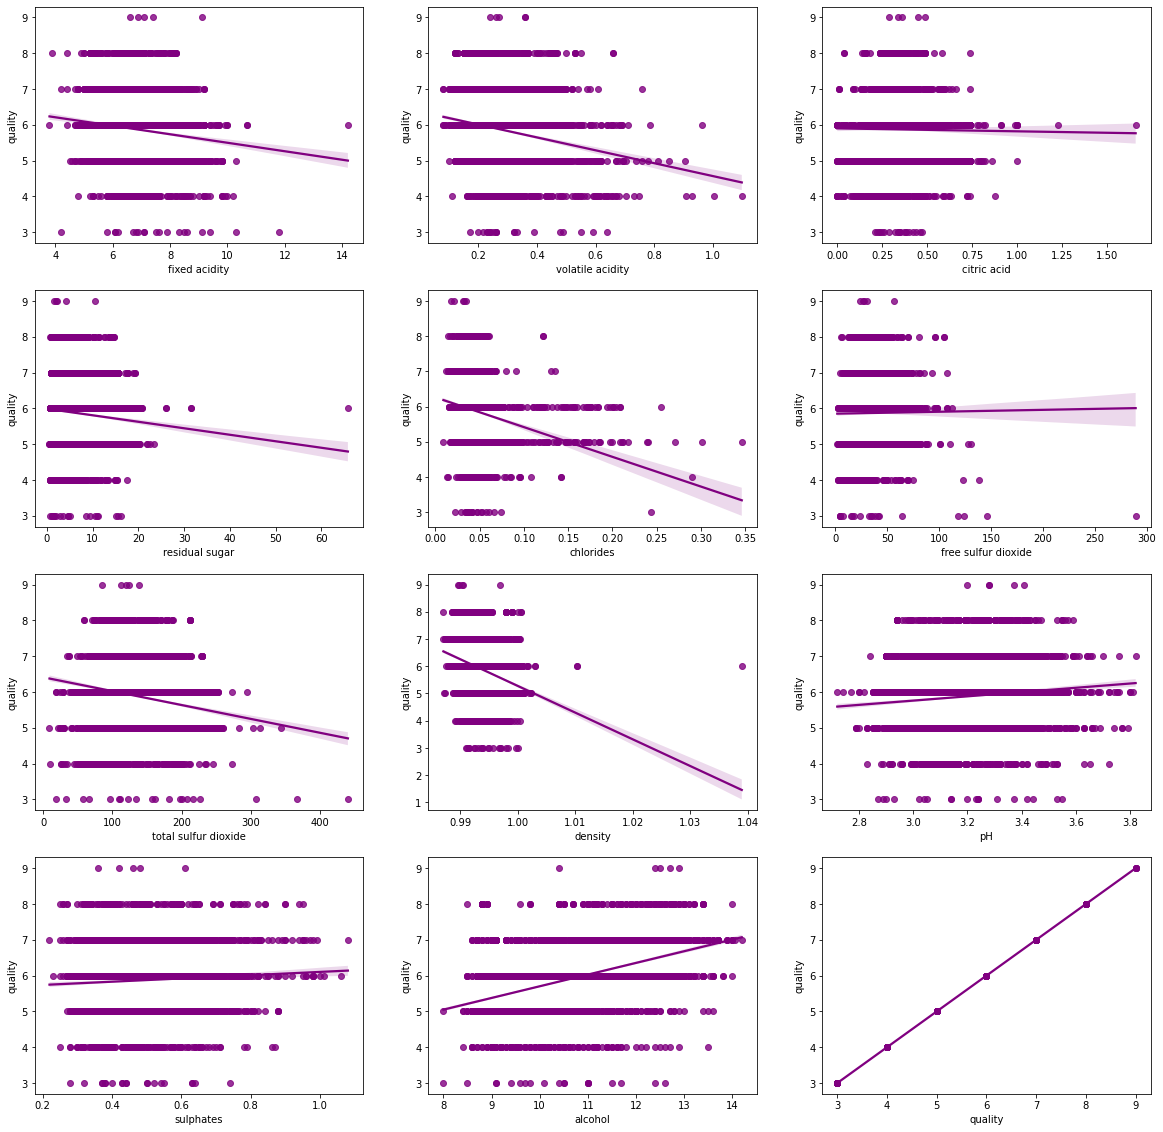

In [ ]:
fig,axs=plt.subplots(nrows=4,ncols=3,figsize=(20,20))
#cols=['density','alcohol','citric acid']
for col,ax in zip(wine.columns,axs.flat):
  sns.regplot(x=wine[col],y=wine['quality'],color='purple',ax=ax,robust=True)

## Training and Testing Data

In [ ]:
X=wine.drop(['quality'], axis=1)
Y=wine['quality']  #alcohol
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.2,random_state=40)
print("X Shape: ", X.shape)
print("X Train: ", X_train.shape," X Test: ", X_test.shape)

X Shape:  (4898, 11)
X Train:  (3918, 11)  X Test:  (980, 11)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train,Y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_test_pred=rf.predict(X_test)

In [ ]:
r2 = r2_score(Y_test, y_test_pred)
print("R2 Score of Random Forest Regressor: ",r2)

R2 Score of Random Forest Regressor:  0.5636852125882053


In [ ]:
#number of rows from dataframe belonging in X_test
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("Adjusted R2 Score of Random Forest: ",adjusted_r2)

Adjusted R2 Score of Random Forest:  0.5587270900039802



**Test :** 

r2_score- 0.5636852125882053

adj r2_score - 0.5587270900039802

### Lasso

In [ ]:
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


lasso = LassoCV(cv=5).fit(X_train, Y_train)
score_lasso=lasso.score(X_test, Y_test) 

print("\n\nLasso Regression:-")
print("R2 Score after five folds: ",score_lasso)




Lasso Regression:-
R2 Score after five folds:  0.28945076652216506
